In [6]:
#%pip install pandas
#%pip install matplotlib
#%pip install seaborn
#%pip install plotly
%pip install nltk
%pip install wordcloud
#%pip install spacy



  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl.metadata (41 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl (273 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.2 kB 487.6 kB/s eta 0:00:01
   ----------------------------------- ---- 266.2/301.2 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

# Download NLTK resources (only needs to be run once)
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")

# Load CSV file
df = pd.read_csv("../data/post_comments.csv")

# Remove empty comments and hashtags
df = df[df["text"].notna()]
df["text"] = df["text"].astype(str).apply(lambda x: re.sub(r"#\w+", "", x).strip())

# Convert timestamp column to datetime
df["createTimeISO"] = pd.to_datetime(df["createTimeISO"])

ModuleNotFoundError: No module named 'pandas'

Filtering and outliers

In [49]:
# Filter to last 6 months
from datetime import datetime
six_months_ago = pd.Timestamp(datetime.today() - pd.DateOffset(months=6), tz="UTC")
df = df[df["createTimeISO"] >= six_months_ago]

# Remove very long comments (e.g. spam or repeated text blocks)
df = df[df["text"].str.split().str.len() < 100]

# Remove comments with excessive repetition of a single word
def has_repeated_word(text, threshold=5):
    words = text.lower().split()
    word_counts = Counter(words)
    return any(count >= threshold for count in word_counts.values())

df = df[~df["text"].apply(has_repeated_word)]

Stopwords and tokenization

In [50]:
# Define standard and custom stopwords
standard_stopwords = set(stopwords.words("german")) | set(stopwords.words("english"))
custom_stopwords = {
    "use", "like", "get", "need", "please", "one", "would", "watch", "want", "que"
}

# Unigram-specific stopwords (standard + custom)
unigram_stopwords = standard_stopwords | custom_stopwords

# Clean + tokenize for unigram analysis
def clean_tokens_unigrams(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Zäöüß]", " ", text)
    tokens = word_tokenize(text)
    return [w for w in tokens if w not in unigram_stopwords and len(w) > 2]

# Clean + tokenize for n-gram analysis (no custom stopwords)
def clean_tokens_ngrams(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Zäöüß]", " ", text)
    tokens = word_tokenize(text)
    return [w for w in tokens if w not in standard_stopwords and len(w) > 2]

# Apply both tokenizations
df["unigram_tokens"] = df["text"].apply(clean_tokens_unigrams)
df["ngram_tokens"] = df["text"].apply(clean_tokens_ngrams)


Most common words

In [51]:
all_unigrams = [word for tokens in df["unigram_tokens"] for word in tokens]
common_unigrams = Counter(all_unigrams).most_common(20)

print("Top 20 unigrams:")
for word, count in common_unigrams:
    print(f"{word}: {count}")

Top 20 unigrams:
skin: 6749
love: 3672
skincare: 2686
face: 1893
good: 1850
acne: 1495
routine: 1481
products: 1460
serum: 1262
girl: 1199
care: 1162
much: 1155
beautiful: 1110
oil: 1083
toner: 1047
cleanser: 1031
aku: 1026
omg: 985
cream: 972
pretty: 966


Most common bigrams

In [52]:
all_bigrams = [bigram for tokens in df["ngram_tokens"] for bigram in ngrams(tokens, 2)]
common_bigrams = Counter([" ".join(b) for b in all_bigrams]).most_common(20)

print("\nTop 20 bigrams:")
for phrase, count in common_bigrams:
    print(f"{phrase}: {count}")


Top 20 bigrams:
skin care: 801
skincare routine: 349
cleansing oil: 333
cleaning fyp: 314
look like: 307
oily skin: 303
sensitive skin: 282
korean skincare: 267
commenting stay: 264
dry skin: 249
acne prone: 220
oil cleanser: 207
skin type: 199
skin looks: 194
wash face: 188
get rid: 186
care routine: 179
feel like: 178
looks like: 176
prone skin: 166


Most common trigrams

In [53]:
all_trigrams = [tg for tokens in df["ngram_tokens"] for tg in ngrams(tokens, 3)]
common_trigrams = Counter([" ".join(tg) for tg in all_trigrams]).most_common(20)

print("\nTop 20 Trigrams:")
for phrase, count in common_trigrams:
    print(f"{phrase}: {count}")


Top 20 Trigrams:
acne prone skin: 154
skin care routine: 140
instagram sagajewels official: 72
would anyone watch: 69
korean skin care: 69
anua cleansing oil: 63
anyone watch grwm: 61
oily acne prone: 59
izin ambil post: 55
skin looks amazing: 53
speed made famous: 47
fungal acne safe: 46
good oily skin: 45
commenting stay side: 44
commenting stay wonyoungism: 44
stay side tiktok: 38
skin care products: 37
commenting stay cleantok: 33
consumerism final boss: 32
get rid acne: 32


Word explanation

"izin ambil post" is Indonesian and means "Permission to take/use the post."

In [54]:
# Helper function to convert Counter results into DataFrame
def counter_to_df(counter, ngram_type):
    df = pd.DataFrame(counter, columns=["ngram", "count"])
    df["type"] = ngram_type
    return df

# Create Counter objects
unigram_counter = Counter(all_unigrams).most_common(20)
bigram_counter = Counter([" ".join(bg) for bg in all_bigrams]).most_common(20)
trigram_counter = Counter([" ".join(tg) for tg in all_trigrams]).most_common(20)

# Convert to DataFrames
df_unigrams = counter_to_df(unigram_counter, "unigram")
df_bigrams = counter_to_df(bigram_counter, "bigram")
df_trigrams = counter_to_df(trigram_counter, "trigram")

# Combine all into one table
df_ngrams = pd.concat([df_unigrams, df_bigrams, df_trigrams], ignore_index=True)

# Sort by count if you want (optional)
df_ngrams = df_ngrams.sort_values(by="count", ascending=False)

# Show the overview
print(df_ngrams.head(30))

               ngram  count     type
0               skin   6749  unigram
1               love   3672  unigram
2           skincare   2686  unigram
3               face   1893  unigram
4               good   1850  unigram
5               acne   1495  unigram
6            routine   1481  unigram
7           products   1460  unigram
8              serum   1262  unigram
9               girl   1199  unigram
10              care   1162  unigram
11              much   1155  unigram
12         beautiful   1110  unigram
13               oil   1083  unigram
14             toner   1047  unigram
15          cleanser   1031  unigram
16               aku   1026  unigram
17               omg    985  unigram
18             cream    972  unigram
19            pretty    966  unigram
20         skin care    801   bigram
21  skincare routine    349   bigram
22     cleansing oil    333   bigram
23      cleaning fyp    314   bigram
24         look like    307   bigram
25         oily skin    303   bigram
2

Keyword explanation (openAI)

In [55]:
#import openai
#import os
#from dotenv import load_dotenv

#load_dotenv()
#openai.api_key = os.getenv("OPENAI_API_KEY")

#from openai import OpenAI

#client = OpenAI(api_key=openai.api_key)

#keywords = [
#    "trop trop trop",
#    "sangat sangat sangat",
#    "skin care routine",
#    "wonyoungism"
#]

#for term in keywords:
#    response = client.chat.completions.create(
#        model="gpt-3.5-turbo",
#        messages=[
#            {"role": "system", "content": "You are a helpful assistant who explains slang and social media terms."},
#            {"role": "user", "content": f"Explain the term '{term}' as it appears in TikTok comments."}
#        ],
#        temperature=0.7
#    )
#    explanation = response.choices[0].message.content
#    print(f"{term}: {explanation}\n")

Trends over time

C:\Users\Surface\AppData\Local\Temp\ipykernel_18212\1536940277.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["week"] = pd.to_datetime(df["createTimeISO"]).dt.to_period("W").dt.start_time


<Figure size 1400x600 with 0 Axes>

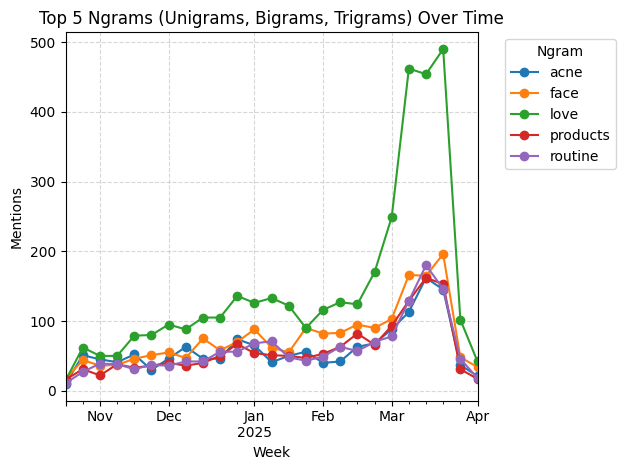

In [56]:
df["week"] = pd.to_datetime(df["createTimeISO"]).dt.to_period("W").dt.start_time

# Combine standard and custom stopwords (only for unigrams)
stop_words = set(stopwords.words("english")) | set(stopwords.words("german"))
custom_stopwords = {"use", "like", "get", "need", "please", "one", "would", "watch", "want", "que", "good", "skin", "skincare"}
unigram_stopwords = stop_words | custom_stopwords

# Clean and tokenize text for unigrams
def tokenize_unigrams(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Zäöüß]", " ", text)
    tokens = word_tokenize(text)
    return [w for w in tokens if w not in unigram_stopwords and len(w) > 2]

# Clean and tokenize text for ngrams
def tokenize_all(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Zäöüß]", " ", text)
    return [w for w in word_tokenize(text) if len(w) > 2]

# Apply both types of tokenization
df["unigrams"] = df["text"].apply(tokenize_unigrams)
df["tokens"] = df["text"].apply(tokenize_all)

# Generate bigrams and trigrams
df["bigrams"] = df["tokens"].apply(lambda t: [" ".join(g) for g in ngrams(t, 2)])
df["trigrams"] = df["tokens"].apply(lambda t: [" ".join(g) for g in ngrams(t, 3)])

# Combine into one long format DataFrame: week + ngram
records = []

for _, row in df.iterrows():
    for word in row["unigrams"] + row["bigrams"] + row["trigrams"]:
        records.append((row["week"], word))

df_all = pd.DataFrame(records, columns=["week", "ngram"])

# Count occurrences per week
weekly_counts = df_all.groupby(["week", "ngram"]).size().reset_index(name="count")

# Identify top 5 ngrams overall
top5 = (
    weekly_counts.groupby("ngram")["count"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter only top 5 for plotting
top_weekly = weekly_counts[weekly_counts["ngram"].isin(top5)]

# Pivot to get ngrams as columns
df_trend = top_weekly.pivot(index="week", columns="ngram", values="count").fillna(0)

# Plot
plt.figure(figsize=(14, 6))
df_trend.plot(marker="o")
plt.title("Top 5 Ngrams (Unigrams, Bigrams, Trigrams) Over Time")
plt.xlabel("Week")
plt.ylabel("Mentions")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Ngram", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

!!! Outliers